# Exploring the Met Github Open Access Data

This project aims to explore the Mets collection data provided on GitHub to explore and visualize its contents and determine where some of its focuses lie. Research question: What type of items does the Met collection prioritize and what type of artist is dominant?

## Load Packages

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import matplotlib.colors as mcolors
import seaborn as sns

## Data

In [4]:
df = pd.read_csv("MetObjects.zip")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476909 entries, 0 to 476908
Data columns (total 54 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Object Number            476909 non-null  object 
 1   Is Highlight             476909 non-null  bool   
 2   Is Timeline Work         476909 non-null  bool   
 3   Is Public Domain         476909 non-null  bool   
 4   Object ID                476909 non-null  int64  
 5   Gallery Number           47330 non-null   object 
 6   Department               476909 non-null  object 
 7   AccessionYear            472409 non-null  object 
 8   Object Name              475322 non-null  object 
 9   Title                    447712 non-null  object 
 10  Culture                  207160 non-null  object 
 11  Period                   90891 non-null   object 
 12  Dynasty                  23237 non-null   object 
 13  Reign                    11225 non-null   object 
 14  Port

In [5]:
df.shape

(476909, 54)

In [6]:
df.dtypes

Object Number               object
Is Highlight                  bool
Is Timeline Work              bool
Is Public Domain              bool
Object ID                    int64
Gallery Number              object
Department                  object
AccessionYear               object
Object Name                 object
Title                       object
Culture                     object
Period                      object
Dynasty                     object
Reign                       object
Portfolio                   object
Constituent ID              object
Artist Role                 object
Artist Prefix               object
Artist Display Name         object
Artist Display Bio          object
Artist Suffix               object
Artist Alpha Sort           object
Artist Nationality          object
Artist Begin Date           object
Artist End Date             object
Artist Gender               object
Artist ULAN URL             object
Artist Wikidata URL         object
Object Date         

In [7]:
df.head()

Object Number  Is Highlight  Is Timeline Work  Is Public Domain  Object ID  \
0    1979.486.1         False             False             False          1   
1    1980.264.5         False             False             False          2   
2      67.265.9         False             False             False          3   
3     67.265.10         False             False             False          4   
4     67.265.11         False             False             False          5   

  Gallery Number         Department AccessionYear Object Name  \
0            NaN  The American Wing        1979.0        Coin   
1            NaN  The American Wing        1980.0        Coin   
2            NaN  The American Wing        1967.0        Coin   
3            NaN  The American Wing        1967.0        Coin   
4            NaN  The American Wing        1967.0        Coin   

                          Title  ... River Classification  \
0  One-dollar Liberty Head Coin  ...   NaN            NaN   
1  Ten-dollar Liberty Head Coin  ...   NaN            NaN   
2    Two-and-a-Half Dollar Coin  ...   NaN            NaN   
3    Two-and-a-Half Dollar Coin  ...   NaN            NaN   
4    Two-and-a-Half Dollar Coin  ...   NaN            NaN   

  Rights and Reproduction                                     Link Resource  \
0                     NaN  http://www.metmuseum.org/art/collection/search/1   
1                     NaN  http://www.metmuseum.org/art/collection/search/2   
2                     NaN  http://www.metmuseum.org/art/collection/search/3   
3                     NaN  http://www.metmuseum.org/art/collection/search/4   
4                     NaN  http://www.metmuseum.org/art/collection/search/5   

  Object Wikidata URL Metadata Date                                Repository  \
0                 NaN           NaN  Metropolitan Museum of Art, New York, NY   
1                 NaN           NaN  Metropolitan Museum of Art, New York, NY   
2                 NaN           NaN  Metropolitan Museum of Art, New York, NY   
3                 NaN           NaN  Metropolitan Museum of Art, New York, NY   
4                 NaN           NaN  Metropolitan Museum of Art, New York, NY   

  Tags Tags AAT URL Tags Wikidata URL  
0  NaN          NaN               NaN  
1  NaN          NaN               NaN  
2  NaN          NaN               NaN  
3  NaN          NaN               NaN  
4  NaN          NaN               NaN  

[5 rows x 54 columns]

In [8]:
df.tail()

Object Number  Is Highlight  Is Timeline Work  Is Public Domain  \
476904     2021.287n         False             False             False   
476905     2021.287o         False             False             False   
476906     2021.287p         False             False             False   
476907     2021.287q         False             False             False   
476908     2021.287r         False             False             False   

        Object ID Gallery Number Department AccessionYear Object Name Title  \
476904     856954            NaN  Asian Art          2021    Drawings   NaN   
476905     856955            NaN  Asian Art          2021    Drawings   NaN   
476906     856956            NaN  Asian Art          2021    Drawings   NaN   
476907     856957            NaN  Asian Art          2021    Drawings   NaN   
476908     856958            NaN  Asian Art          2021    Drawings   NaN   

        ... River Classification Rights and Reproduction  \
476904  ...   NaN      Paintings                     NaN   
476905  ...   NaN      Paintings                     NaN   
476906  ...   NaN      Paintings                     NaN   
476907  ...   NaN      Paintings                     NaN   
476908  ...   NaN      Paintings                     NaN   

                                            Link Resource Object Wikidata URL  \
476904  http://www.metmuseum.org/art/collection/search...                 NaN   
476905  http://www.metmuseum.org/art/collection/search...                 NaN   
476906  http://www.metmuseum.org/art/collection/search...                 NaN   
476907  http://www.metmuseum.org/art/collection/search...                 NaN   
476908  http://www.metmuseum.org/art/collection/search...                 NaN   

       Metadata Date                                Repository Tags  \
476904           NaN  Metropolitan Museum of Art, New York, NY  NaN   
476905           NaN  Metropolitan Museum of Art, New York, NY  NaN   
476906           NaN  Metropolitan Museum of Art, New York, NY  NaN   
476907           NaN  Metropolitan Museum of Art, New York, NY  NaN   
476908           NaN  Metropolitan Museum of Art, New York, NY  NaN   

       Tags AAT URL Tags Wikidata URL  
476904          NaN               NaN  
476905          NaN               NaN  
476906          NaN               NaN  
476907          NaN               NaN  
476908          NaN               NaN  

[5 rows x 54 columns]

In [9]:
df.columns

Index(['Object Number', 'Is Highlight', 'Is Timeline Work', 'Is Public Domain',
       'Object ID', 'Gallery Number', 'Department', 'AccessionYear',
       'Object Name', 'Title', 'Culture', 'Period', 'Dynasty', 'Reign',
       'Portfolio', 'Constituent ID', 'Artist Role', 'Artist Prefix',
       'Artist Display Name', 'Artist Display Bio', 'Artist Suffix',
       'Artist Alpha Sort', 'Artist Nationality', 'Artist Begin Date',
       'Artist End Date', 'Artist Gender', 'Artist ULAN URL',
       'Artist Wikidata URL', 'Object Date', 'Object Begin Date',
       'Object End Date', 'Medium', 'Dimensions', 'Credit Line',
       'Geography Type', 'City', 'State', 'County', 'Country', 'Region',
       'Subregion', 'Locale', 'Locus', 'Excavation', 'River', 'Classification',
       'Rights and Reproduction', 'Link Resource', 'Object Wikidata URL',
       'Metadata Date', 'Repository', 'Tags', 'Tags AAT URL',
       'Tags Wikidata URL'],
      dtype='object')

In [10]:
df.describe()

Object ID  Object Begin Date  Object End Date  Metadata Date
count  476909.000000      476909.000000    476909.000000            0.0
mean   386802.142312        1292.977042      1394.221007            NaN
std    236808.800544        1777.688093      1154.910875            NaN
min         1.000000     -400000.000000   -240000.000000            NaN
25%    209885.000000        1527.000000      1581.000000            NaN
50%    370801.000000        1800.000000      1835.000000            NaN
75%    563289.000000        1890.000000      1905.000000            NaN
max    856958.000000        5000.000000     15335.000000            NaN

### Cleaning & Preprocessing

In [11]:
#check for duplicates
print(df.duplicated())

#check for empty rows
df.dropna(how = "all")

#setting an index
df.set_index("Object Number", inplace = True, drop = False)

#removing duplicate column
data = df.drop("Object Number", axis = "columns")

#lowercase
data_new = data.applymap(lambda x: x.lower() if type(x) == str else x)

0         False
1         False
2         False
3         False
4         False
          ...  
476904    False
476905    False
476906    False
476907    False
476908    False
Length: 476909, dtype: bool


## Visualization & Analysis

### Object Departments

In [12]:
#subsetting data
data2 = data_new[["Object ID", "Department", "AccessionYear", "Classification"]]

data2.head()

Object ID         Department AccessionYear Classification
Object Number                                                           
1979.486.1             1  the american wing        1979.0            NaN
1980.264.5             2  the american wing        1980.0            NaN
67.265.9               3  the american wing        1967.0            NaN
67.265.10              4  the american wing        1967.0            NaN
67.265.11              5  the american wing        1967.0            NaN

In [13]:
#cleaning
deps = data2["Department"].drop_duplicates()

In [14]:
data3 = data2["Department"].value_counts()

data4 = data3.to_frame()

data4.rename(columns={"Department": "NumObjects"}, inplace=True)

data4

NumObjects
drawings and prints                            166816
european sculpture and decorative arts          42921
photographs                                     37003
asian art                                       36723
greek and roman art                             33744
costume institute                               31329
egyptian art                                    27963
the american wing                               18386
islamic art                                     15472
modern and contemporary art                     14153
arms and armor                                  13607
arts of africa, oceania, and the americas       12329
medieval art                                     7149
ancient near eastern art                         6221
musical instruments                              5203
european paintings                               2616
robert lehman collection                         2586
the cloisters                                    2338
the libraries                                     350

In [15]:
values = data4["NumObjects"].tolist()

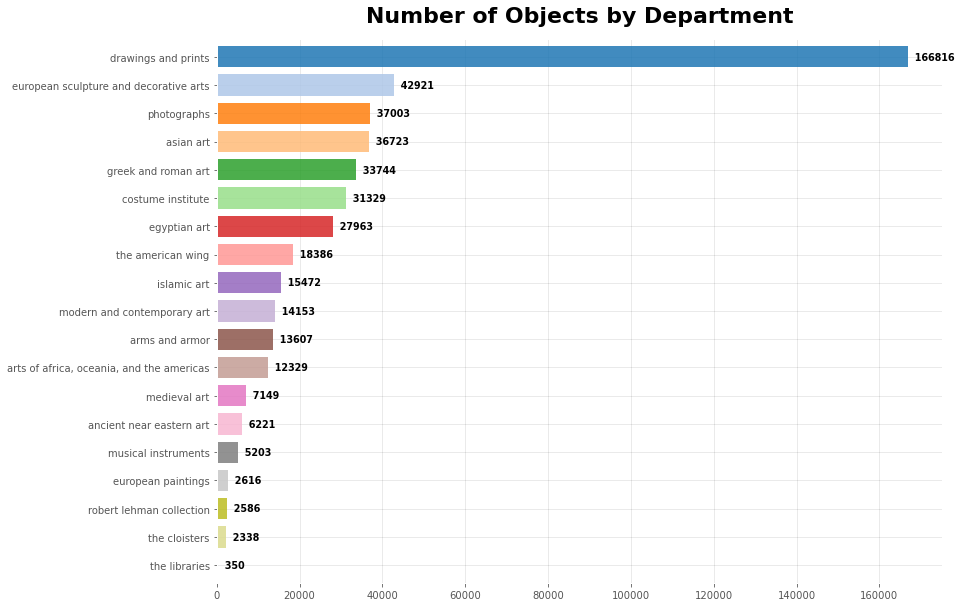

In [16]:
#object type plot

colors = sns.color_palette("tab20")

def dep_barh(): 
    plt.style.use("ggplot")

    fig, ax1 = plt.subplots()
    ax1.set_facecolor("white")
    plt.grid(color = "black", alpha = 0.1)
    
    fig.set_size_inches(13, 10)
    sns.set_context("paper")
    
    data4["NumObjects"].plot(kind = "barh", align = "center", width = 0.75, color = colors, alpha = 0.85)
    
    plt.gca().invert_yaxis()
    
    ax1.set_title("Number of Objects by Department", fontsize = 22, weight = "bold", y = 1.02)
    
    for i, j in enumerate(values):
        ax1.text(j, i + 0.1, ("  " + str(values[i])), color = "black", fontweight = "bold")
    
    plt.rcParams["font.family"] = "serif"
    plt.rcParams["font.serif"] = "Georgia"
    
    plt.show()
    
dep_barh()

#### Drawing and Prints: Date and Medium

In [17]:
#subsetting data

d_p_data = data_new[["Department","Object Date","Medium"]]

d_p_data2 = d_p_data.loc[data_new["Department"] == 'drawings and prints']

print(d_p_data2)

                        Department                   Object Date  \
Object Number                                                      
27.114         drawings and prints  late 16th–early 17th century   
1977.595.135   drawings and prints                      ca. 1808   
2021.28.3      drawings and prints                          1893   
2021.28.1      drawings and prints                          1867   
2021.28.2      drawings and prints                      ca. 1879   
...                            ...                           ...   
2021.168.2     drawings and prints                          1978   
2021.168.3     drawings and prints                          1986   
2021.168.4     drawings and prints                       1977-86   
2021.168.5     drawings and prints                          1986   
63.550.529     drawings and prints                     1872-1874   

                                                          Medium  
Object Number                                   

In [18]:
#finding the number of categories

date_num = d_p_data2["Object Date"].nunique()

print(date_num)

med_num = d_p_data2["Medium"].nunique()

print(med_num)

15209
19570


In [19]:
#viewing highest and lowest values

d_p_data2["Object Date"].value_counts().idxmax()

d_p_data2["Object Date"].value_counts().idxmin()

d_p_data2["Medium"].value_counts().idxmax()

d_p_data2["Medium"].value_counts().idxmin()


'ink and color on linen/silk tracing paper'

In [20]:
#top 10 values

dates = d_p_data2[["Object Date"]].value_counts()[:10].to_frame()

print(dates)

mediums = d_p_data2[["Medium"]].value_counts()[:10].to_frame()

print(mediums)


                 0
Object Date       
1888          4567
1890          3316
1889          3156
19th century  2900
17th century  2882
n.d.          2522
1887          2063
ca. 1888      2026
1910          1838
1880s         1763
                                      0
Medium                                 
commercial color lithograph       18342
etching                           16925
engraving                         11419
albumen photograph                 9653
lithograph                         6232
woodcut                            4628
commercial color photolithograph   3499
etching and engraving              3284
commercial photolithograph         3150
wood engraving                     2314


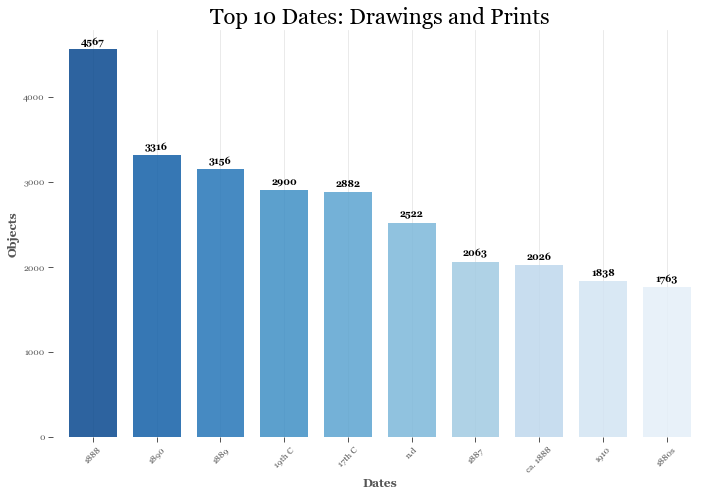

In [21]:
#dates plot

colors2 = sns.color_palette("Blues_r", 10)

def date_bar():
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 7)
    ax.set_facecolor("white")
    plt.grid(color = "black", alpha = 0.1)
    
    dates[0].plot(kind = "bar", align = "center", width = 0.75, color = colors2, rot = 70, alpha = 0.85)

    ax.set_xlabel("Dates", weight = "bold", size = 12)
    ax.set_ylabel("Objects", weight = "bold", size = 12)
    ax.set_title("Top 10 Dates: Drawings and Prints", fontsize = 22)
    plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],["1888", "1890", "1889", "19th C", "17th C", "n.d", "1887", "ca. 1888", "1910", "1880s"], rotation = 45)
    
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.grid(axis = "y")
    
    x = [i for i in range(1,11)]
    values2 = d_p_data2[["Object Date"]].value_counts()[:10].to_list()
    
    for i in range(len(dates[0])):
        plt.annotate(values2[i], (i, x[i] + (values2[i]) + 60), ha = "center", color = "black", fontweight = "bold")
        
    plt.rcParams["font.family"] = "serif"
    plt.rcParams["font.serif"] = "Georgia"
    
    sns.set_context("paper")
    
    fig.tight_layout()

    plt.show()
    
date_bar()

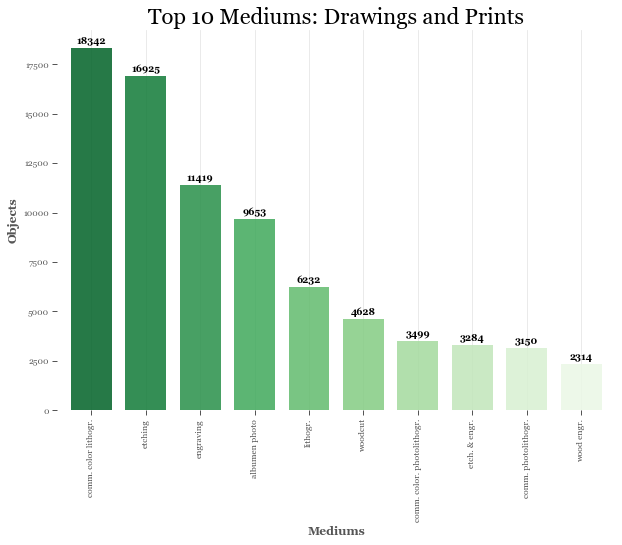

In [22]:
#mediums plot

colors3 = sns.color_palette("Greens_r", 10)

def med_bar():
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 7)
    ax.set_facecolor("white")
    plt.grid(color = "black", alpha = 0.1)
    
    mediums[0].plot(kind = "bar", align = "center", width = 0.75, color = colors3, rot = 0, alpha = 0.85)
    
    ax.set_xlabel("Mediums", weight = "bold", size = 12)
    ax.set_ylabel("Objects", weight = "bold", size = 12)
    ax.set_title("Top 10 Mediums: Drawings and Prints", fontsize = 22)
    plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],["comm. color lithogr.", "etching", "engraving", "albumen photo","lithogr.", "woodcut", "comm. color. photolithogr.", "etch. & engr.", "comm. photolithogr.", "wood engr."], rotation = 90)
    
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.grid(axis = "y")
    
    x = [i for i in range(1,11)]
    values3 = d_p_data2[["Medium"]].value_counts()[:10].to_list()
    
    for i in range(len(mediums[0])):
        plt.annotate(values3[i], (i, x[i] + (values3[i]) + 220), ha = "center", color = "black", fontweight = "bold")
    
    plt.rcParams["font.family"] = "serif"
    plt.rcParams["font.serif"] = "Georgia"
    
    sns.set_context("paper")
    
    plt.show()

med_bar()

### Artists

In [ ]:
#### Nationality

In [23]:
#subsetting data
nat_data = data_new["Artist Nationality"].value_counts()

print(nat_data)

                                                                                                                                                                                                                     67220
american                                                                                                                                                                                                             46555
 |                                                                                                                                                                                                                   17071
french                                                                                                                                                                                                               16319
italian                                                                                                                     

In [24]:
#cleaning
nat_data2 = data_new["Artist Nationality"]\
                          .astype(str).str.replace("|", " ")

In [25]:
#top values
d = data_new.groupby("Artist Nationality").size().sort_values(ascending = False)

In [26]:
#full view
pd.set_option("display.max_rows", None, "display.max_columns", None)
d

Artist Nationality
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [27]:
#quick overview
d.describe()

count     5025.000000
mean        54.656119
std       1241.219234
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max      67220.000000
dtype: float64

In [28]:
nat_df = d.to_frame()

nat_df

0
Artist Nationality                                       
                                                    67220
american                                            46555
 |                                                  17071
french                                              16319
italian                                             11684
french|french                                        8604
british                                              7676
german                                               6698
american|american                                    6516
japanese                                             6015
 | |                                                 5878
italian|italian                                      4212
american|                                            3908
french|french|french                                 3848
dutch                                                2379
british|british                                      2187
chinese                                              1782
 | | |                                               1667
french|                                              1350
netherlandish                                        1274
spanish                                              1149
german|german                                        1133
netherlandish|netherlandish                          1001
british|british|british                              1000
american|american|american                            936
italian|italian|italian                               921
netherlandish|netherlandish|netherlandish             888
italian|french                                        856
american, born germany                                841
 |american                                            724
austrian                                              622
british, scottish                                     593
austrian|                                             557
french|italian                                        551
 |french                                              504
russian                                               466
french|french|french|french                           462
swiss                                                 452
british|                                              445
bohemian                                              443
netherlandish|netherlandish|netherlandish|nethe...    439
 | | | |                                              436
flemish                                               413
british, scottish|british, scottish|british, sc...    412
italian|                                              405
american, born russia                                 383
german|                                               357
american, born hungary                                356
spanish|french                                        347
american| |                                           323
german|german|german                                  316
american, born england                                308
italian|italian|italian|italian                       307
british|british|british|british                       302
japanese|japanese                                     299
belgian                                               297
french, born russia                                   255
mexican                                               253
dutch|dutch                                           250
french|italian|italian                                249
 |italian                                             249
french|dutch                                          247
danish                                                244
french| |                                             243
american|american|                                    243
spanish|french|                                       236
american, born france                                 235
 |austrian                                            

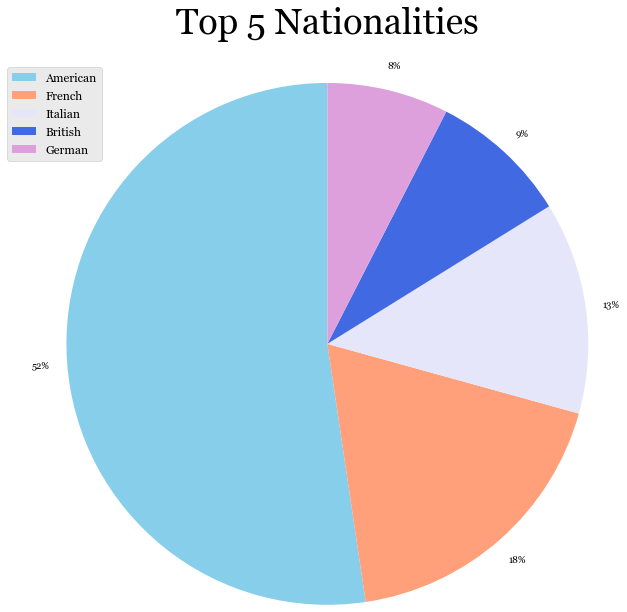

In [29]:
#nationality plot

pie_data = [46555, 16319, 11684, 7676, 6698]

labels = ["American", "French", "Italian", "British", "German"]

colors = ["skyblue", "lightsalmon", "lavender", "royalblue", "plum"]

def nat_pie():
    plt.pie(pie_data, labels = None, autopct = "%1.0f%%", pctdistance = 1.1, startangle = -270, colors = colors, radius = 3)
    
    plt.title("Top 5 Nationalities", x = 0.5, y = 1.9, fontsize = 36)
    plt.legend(labels, loc = "upper left", bbox_to_anchor = (-1, 1.8), prop = {"size": 12})
    
    plt.rcParams["font.family"] = "serif"
    plt.rcParams["font.serif"] = "Georgia"
    
    sns.set_context("paper")
    
    plt.show()

nat_pie()

#### Gender: Female

In [30]:
#viewing categories
data_new["Artist Gender"].value_counts()

|                                                                                                                                                                                         56514
||                                                                                                                                                                                        20962
female                                                                                                                                                                                     8676
|||                                                                                                                                                                                        6221
female|                                                                                                                                                                                    2669
||||                                    

In [31]:
data_new.groupby("Artist Gender").count()

Is Highlight  \
Artist Gender                                                      
female                                                      8676   
female|                                                     2669   
female|female                                                199   
female|female|                                                30   
female|female|female                                           2   
female|female|female|                                          2   
female|female|female|female|female|female|female               1   
female|female|female|female|female|female|femal...             1   
female|female|female|female|female||female|fema...             1   
female|female|female|||||||                                    1   
female|female||                                               10   
female|female||female                                          3   
female|female||female|                                         1   
female|female|||                                               2   
female||                                                     458   
female||female                                                28   
female||female|                                                4   
female||female|female                                          9   
female||female|female|female||female|female||                  1   
female||female||                                               1   
female||female||female|||||||||||||                            1   
female||female|||                                              1   
female||female||||||female|                                    1   
female|||                                                     59   
female|||female                                                2   
female|||female|                                               4   
female|||female||female||||                                    1   
female|||female|||female|                                      1   
female|||female||||||||||female|||||                           1   
female||||                                                    11   
female||||female                                               2   
female||||female|                                              1   
female||||female|||female|female|female|female|...             1   
female||||female|||female|||||||||||||||||female|              1   
female||||female|||||female|||                                 1   
female||||female||||||female||||female||female|...             1   
female|||||                                                    6   
female|||||female                                              1   
female|||||female|                                             1   
female|||||female||||female|                                   1   
female|||||female||||||||||||||||female|                       1   
female||||||                                                   5   
female||||||female                                             1   
female|||||||                                                  4   
female|||||||female|female||||female||                         1   
female|||||||||||                                              1   
female||||||||||||                                             1   
female|||||||||||||                                            1   
female||||||||||||||                                           1   
female||||||||||||||female|||||||||||||||||                    1   
female||||||||||||||||||female|||||||||||||||||...             1   
female|||||||||||||||||||||||||||||female||fema...             1   
|                                                          56514   
|female                                                     1006   
|female|                                                     285   
|female|female                                                12   
|female|female|                                                2   
|female|female|female                   

In [35]:
#attempting to clean, subcategorize and count
female = data_new["Artist Gender"].str.contains("female", na=False).sum()

na = data_new["Artist Gender"].str.contains("nan").sum()

ul = len(data_new.index)

print(female, na, ul)

14223 0 476909


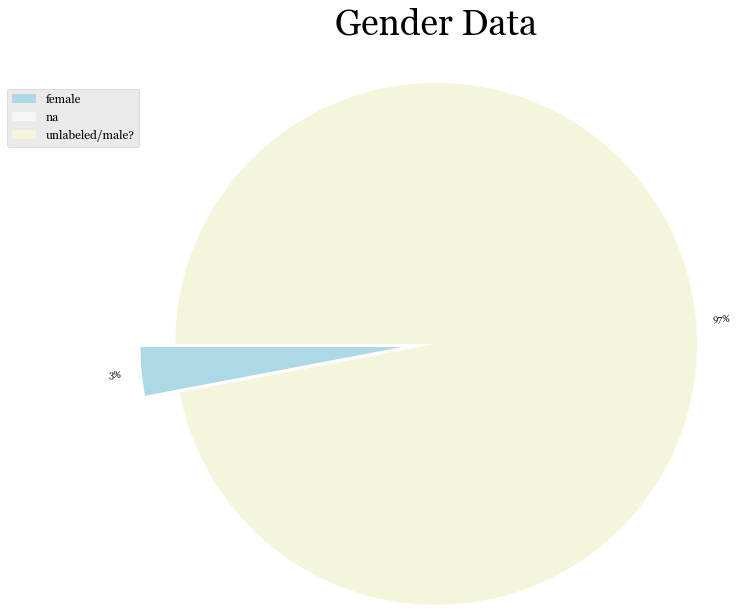

In [34]:
#gender plot

pie_data2 = [female, na, (ul - (female + na))]

labels2 = ["female", "na", "unlabeled/male?"]

wedge = [ 0.4, 0, 0]

colors2 = ["lightblue", "whitesmoke", "beige"]

def autopct(pct):
    return ("%1.0f%%" % pct) if pct > 0 else ""

def gender_pie():
    plt.pie(pie_data2, autopct = autopct, pctdistance = 1.1, labels = None, startangle = -180, explode = wedge, colors = colors2, radius = 3)
    plt.legend(labels2, loc = "upper left", bbox_to_anchor = (-1.5, 1.7), prop = {"size": 12})
    plt.title("Gender Data", x = 0.5, y = 1.9, fontsize = 36)
    
    plt.rcParams["font.family"] = "serif"
    plt.rcParams["font.serif"] = "Georgia"
    
    sns.set_context("paper")
    
    plt.show()

gender_pie()